In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\kaish\Downloads\NLP\GL project\archive (15)\blogtext.csv").head(10000)
df

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
...,...,...,...,...,...,...,...
9995,1705136,female,25,indUnk,Pisces,"19,May,2004",take me home with you forever where I ...
9996,1705136,female,25,indUnk,Pisces,"23,June,2004",seductive secretness behind doors warn...
9997,1705136,female,25,indUnk,Pisces,"21,June,2004",For being so kind to me when I need yo...
9998,1705136,female,25,indUnk,Pisces,"09,June,2004",blurry outside sounds as people mingle...


In [3]:
df.shape

(10000, 7)

## Preprocess rows of the “text” column (7.5 points)
* a. Remove unwanted characters
* b. Convert text to lowercase
* c. Remove unwanted spaces
* d. Remove stopwords


In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kaish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
from nltk.corpus import stopwords
stop=stopwords.words("english")

In [6]:

import re

In [7]:
df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

In [8]:
df['text'] = df['text'].str.strip()

In [9]:
df["text"]=df["text"].apply(lambda  x:" ".join(x for x in x.lower().split() if x not in stop))


In [10]:
df

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info found 100 pages 45 mb pdf files wait unti...
1,2059027,male,15,Student,Leo,"13,May,2004",team members drewes van der laag urllink mail ...
2,2059027,male,15,Student,Leo,"12,May,2004",het kader van kernfusie op aarde maak je eigen...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks yahoos toolbar capture urls popupswhich...
...,...,...,...,...,...,...,...
9995,1705136,female,25,indUnk,Pisces,"19,May,2004",take home forever may rest sleep arms forgotte...
9996,1705136,female,25,indUnk,Pisces,"23,June,2004",seductive secretness behind doors warning neve...
9997,1705136,female,25,indUnk,Pisces,"21,June,2004",kind need holding hand petting hair cry bring ...
9998,1705136,female,25,indUnk,Pisces,"09,June,2004",blurry outside sounds people mingle pass darkn...


In [11]:
common_words=pd.Series(" ".join(df["text"]).split()).value_counts()[:60]
common_words

im           7568
like         7374
one          5807
dont         4994
get          4674
know         4462
urllink      4135
time         4074
would        3952
think        3877
really       3804
go           3549
people       3425
good         3335
well         3018
got          2921
going        2914
see          2888
day          2863
back         2807
much         2683
love         2508
last         2403
want         2394
even         2344
could        2319
new          2257
ive          2242
way          2179
say          2149
little       2114
something    2084
make         2075
us           2028
today        2022
things       1988
first        1970
life         1954
right        1940
cant         1938
never        1921
thats        1911
went         1902
work         1897
still        1870
said         1832
night        1822
thing        1786
feel         1758
also         1708
didnt        1701
2            1673
need         1642
ill          1529
two          1525
around    

word_rem=["im","know","-","i've","it.","can't","i'll","&nbsp","that's","me."]

In [12]:
import warnings
warnings.filterwarnings("ignore")

df["text"]=df["text"].apply(lambda  x:" ".join(x for x in x.lower().split() if x not in word_rem))


not_common=pd.Series(" ".join(df["text"]).split()).value_counts()[-100:]
not_common

df["text"]=df["text"].apply(lambda  x:" ".join(x for x in x.lower().split() if x not in not_common))

# 3. As we want to make this into a multi-label classification problem, you are required to merge all the label columns together, so that we have all the labels together for a particular sentence (7.5 points)
### a. Label columns to merge: “gender”, “age”, “topic”, “sign”

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10000 non-null  int64 
 1   gender  10000 non-null  object
 2   age     10000 non-null  int64 
 3   topic   10000 non-null  object
 4   sign    10000 non-null  object
 5   date    10000 non-null  object
 6   text    10000 non-null  object
dtypes: int64(2), object(5)
memory usage: 547.0+ KB


In [14]:
df["labels"] = df.apply(lambda x: [x["gender"], str(x["age"]), x["topic"], x["sign"]], axis=1)

In [15]:
df

,id,gender,age,topic,sign,date,text,labels
0,2059027,male,15,Student,Leo,"14,May,2004",info found 100 pages 45 mb pdf files wait unti...,"[male, 15, Student, Leo]"
1,2059027,male,15,Student,Leo,"13,May,2004",team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,2059027,male,15,Student,Leo,"12,May,2004",het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing,"[male, 15, Student, Leo]"
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"
...,...,...,...,...,...,...,...,...
9995,1705136,female,25,indUnk,Pisces,"19,May,2004",take home forever may rest sleep arms forgotte...,"[female, 25, indUnk, Pisces]"
9996,1705136,female,25,indUnk,Pisces,"23,June,2004",seductive secretness behind doors warning neve...,"[female, 25, indUnk, Pisces]"
9997,1705136,female,25,indUnk,Pisces,"21,June,2004",kind need holding hand petting hair cry bring ...,"[female, 25, indUnk, Pisces]"
9998,1705136,female,25,indUnk,Pisces,"09,June,2004",blurry outside sounds people mingle pass darkn...,"[female, 25, indUnk, Pisces]"


# After completing the previous step, there should be only two columns in your data frame i.e. “text” and “labels” as shown in the below image#

In [16]:
df=df[["text","labels"]]
df

,text,labels
0,info found 100 pages 45 mb pdf files wait unti...,"[male, 15, Student, Leo]"
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"
...,...,...
9995,take home forever may rest sleep arms forgotte...,"[female, 25, indUnk, Pisces]"
9996,seductive secretness behind doors warning neve...,"[female, 25, indUnk, Pisces]"
9997,kind need holding hand petting hair cry bring ...,"[female, 25, indUnk, Pisces]"
9998,blurry outside sounds people mingle pass darkn...,"[female, 25, indUnk, Pisces]"


# 4. Separate features and labels, and split the data into training and testing (5 points)

In [17]:
from sklearn.model_selection import train_test_split
x=df["text"]
y=df["labels"]

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

#Vectorize the features (5 points) 
* a. Create a Bag of Words using count vectorizer 
* i. Use ngram_range=(1, 2) 
* ii. Vectorize training and testing features

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
vector = CountVectorizer(ngram_range=(1, 2),max_features=5000)
vector.fit(x_train)

CountVectorizer(max_features=5000, ngram_range=(1, 2))

# b. Print the term-document matrix 

In [21]:
DTM_train = vector.transform(x_train)
DTM_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
vector.get_feature_names_out()

array(['04', '10', '10 minutes', ..., 'zero', 'zmx', 'zone'], dtype=object)

In [23]:
dtm_features_train = pd.DataFrame(DTM_train.toarray(),columns=vector.get_feature_names_out())
dtm_features_train

,04,10,10 minutes,10 years,100,1000,1030,10th,11,12,...,youre,youre going,youth,youve,youve got,yr,yummy,zero,zmx,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6997,0,0,0,0,0,0,0,1,0,2,...,2,0,0,0,0,0,0,0,0,0
6998,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [24]:
DTM_test = vector.transform(x_test)
DTM_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
dtm_features_test = pd.DataFrame(DTM_test.toarray(),columns=vector.get_feature_names_out())
dtm_features_test.shape

(3000, 5000)

# 6.Create a dictionary to get the count of every label i.e. the key will be label name and value will be the total count of the label. Check below image for reference (5 points)

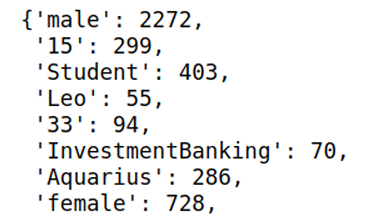

In [26]:
df['labels']

0                      [male, 15, Student, Leo]
1                      [male, 15, Student, Leo]
2                      [male, 15, Student, Leo]
3                      [male, 15, Student, Leo]
4       [male, 33, InvestmentBanking, Aquarius]
                         ...                   
9995               [female, 25, indUnk, Pisces]
9996               [female, 25, indUnk, Pisces]
9997               [female, 25, indUnk, Pisces]
9998               [female, 25, indUnk, Pisces]
9999               [female, 25, indUnk, Pisces]
Name: labels, Length: 10000, dtype: object

In [27]:
from collections import Counter

labels_flat = [label for sublist in df['labels'] for label in sublist]

# Create a dictionary to store the counts
label_counts = dict(Counter(labels_flat))

# Print the dictionary
print(label_counts)

{'male': 5916, '15': 602, 'Student': 1137, 'Leo': 301, '33': 136, 'InvestmentBanking': 70, 'Aquarius': 571, 'female': 4084, '14': 212, 'indUnk': 3287, 'Aries': 4198, '25': 386, 'Capricorn': 215, '17': 1185, 'Gemini': 150, '23': 253, 'Non-Profit': 71, 'Cancer': 504, 'Banking': 16, '37': 33, 'Sagittarius': 1097, '26': 234, '24': 655, 'Scorpio': 971, '27': 1054, 'Education': 270, '45': 16, 'Engineering': 127, 'Libra': 491, 'Science': 63, '34': 553, '41': 20, 'Communications-Media': 99, 'BusinessServices': 91, 'Sports-Recreation': 80, 'Virgo': 236, 'Taurus': 812, 'Arts': 45, 'Pisces': 454, '44': 3, '16': 440, 'Internet': 118, 'Museums-Libraries': 17, 'Accounting': 4, '39': 79, '35': 2315, 'Technology': 2654, '36': 1708, 'Law': 11, '46': 7, 'Consulting': 21, 'Automotive': 14, '42': 14, 'Religion': 9, '13': 42, 'Fashion': 1622, '38': 46, '43': 6, 'Publishing': 4, '40': 1, 'Marketing': 156, 'LawEnforcement-Security': 10, 'HumanResources': 2, 'Telecommunications': 2}


In [51]:
len(label_counts)

64

# 8.  Transform the labels - (7.5 points) 
# As we have noticed before, in this task each example can have multiple tags. To deal with such kind of prediction, we need to transform labels in a binary form and the prediction will be a mask of 0s and 1s. For this purpose, it is convenient to use MultiLabelBinarizer from sklearn 
# a. Convert your train and test labels using MultiLabelBinarizer 

In [28]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=sorted(label_counts.keys()))

In [29]:
df

,text,labels
0,info found 100 pages 45 mb pdf files wait unti...,"[male, 15, Student, Leo]"
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"
...,...,...
9995,take home forever may rest sleep arms forgotte...,"[female, 25, indUnk, Pisces]"
9996,seductive secretness behind doors warning neve...,"[female, 25, indUnk, Pisces]"
9997,kind need holding hand petting hair cry bring ...,"[female, 25, indUnk, Pisces]"
9998,blurry outside sounds people mingle pass darkn...,"[female, 25, indUnk, Pisces]"


In [30]:
y_train = y_train.apply(lambda x:list(map(str,x)))
y_test = y_test.apply(lambda x:list(map(str,x)))

In [31]:
train_labels_transformed = mlb.fit_transform(y_train)

# Transform test labels
test_labels_transformed = mlb.transform(y_test)

In [32]:
train_labels_transformed

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0]])

In [33]:
test_labels_transformed

array([[0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 1, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0]])

In [34]:
mlb.classes_

array(['13', '14', '15', '16', '17', '23', '24', '25', '26', '27', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', 'Accounting', 'Aquarius', 'Aries', 'Arts',
       'Automotive', 'Banking', 'BusinessServices', 'Cancer', 'Capricorn',
       'Communications-Media', 'Consulting', 'Education', 'Engineering',
       'Fashion', 'Gemini', 'HumanResources', 'Internet',
       'InvestmentBanking', 'Law', 'LawEnforcement-Security', 'Leo',
       'Libra', 'Marketing', 'Museums-Libraries', 'Non-Profit', 'Pisces',
       'Publishing', 'Religion', 'Sagittarius', 'Science', 'Scorpio',
       'Sports-Recreation', 'Student', 'Taurus', 'Technology',
       'Telecommunications', 'Virgo', 'female', 'indUnk', 'male'],
      dtype=object)

In [35]:
x_test

8018    today spring day asscraft im red cherry guysll...
9225                         urllink bible gateway song 1
3854    realize postings ive bit err highstrung see re...
2029    check easily amused buffoons urllink editing room
3539    urllink global cooling prime example dont buy ...
                              ...                        
4208    fussy day add urllink fussy blogroll surfing u...
5335    lost soul urllink sign black zodiac brought ur...
2554    spoiler havnet seen matrix reloaded didnt know...
13      much different anything ive ever seen well hav...
4468      referrer exactly page fit pyromaniac make booms
Name: text, Length: 3000, dtype: object

In [36]:
x_train

1191    thats right week jen arrives thursday staying ...
4458    pick president urllink smart ive seen many blo...
1131    today freaking boring remind never go guys pla...
9562    past week different one since ked sick dont li...
6579    go see bowling columbine saw day good surprisi...
                              ...                        
350     mobile phoneliterally part 2 walked slowly tow...
79      hard think less week together friends fly away...
8039    seem signed blog intention post comment seeing...
6936    think lot complexities dont think two types pe...
5640    great urllink article discusses potential supp...
Name: text, Length: 7000, dtype: object

In [37]:
mlb_features_train = pd.DataFrame(train_labels_transformed,columns=mlb.classes_,index=x_train.index)
mlb_features_train

,13,14,15,16,17,23,24,25,26,27,...,Scorpio,Sports-Recreation,Student,Taurus,Technology,Telecommunications,Virgo,female,indUnk,male
1191,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1131,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
9562,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6579,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
79,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
8039,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
mlb_features_test = pd.DataFrame(test_labels_transformed,columns=mlb.classes_,index=x_test.index)
mlb_features_test

,13,14,15,16,17,23,24,25,26,27,...,Scorpio,Sports-Recreation,Student,Taurus,Technology,Telecommunications,Virgo,female,indUnk,male
8018,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
9225,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3854,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2029,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
5335,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# 8.Choose a classifier - (5 points) 
# In this task, we suggest using the One-vs-Rest approach, which is implemented in OneVsRestClassifier class. In this approach k classifiers (= number of tags) are trained. As a basic classifier, use LogisticRegression. It is one of the simplest methods, but often it performs good enough in text classification tasks. It might take some time because the number of classifiers to train is large. 
### a. Use a linear classifier of your choice, wrap it up in OneVsRestClassifier to train it on every label 
### b. As One-vs-Rest approach might not have been discussed in the sessions, we are providing you with the code for that

In [39]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [40]:
clf=LogisticRegression(solver="lbfgs", max_iter=1000)
clf=OneVsRestClassifier(clf)

In [41]:
clf.fit(dtm_features_train,mlb_features_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

# 9. Fit the classifier, make predictions and get the accuracy (5 points) 
## a. Print the following 
## i. Accuracy score 
## ii. F1 score 
## iii. Average precision score 
## iv. Average recall score 
## v. Tip: Make sure you are familiar with all of them. How would you expect the things to work for the multi-label scenario? Read about micro/macro/weighted averaging 

In [42]:
ypred= clf.predict(dtm_features_test)

In [49]:
ypred = pd.DataFrame(ypred,index=y_test.index,columns=mlb.classes_)

In [43]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
accuracy_score(mlb_features_test,ypred)

0.283

In [44]:
f1_score(mlb_features_test,ypred,average='micro')

0.6159054022722004

In [45]:
precision_score(mlb_features_test,ypred,average='micro')

0.694302143230528

In [46]:
recall_score(mlb_features_test,ypred,average='micro')

0.5534166666666667

# 10.  Print true label and predicted label for any five examples (7.5 points)

In [50]:
for i in range(5):  # Print for five examples
    print(f"Example {i+1}:")
    print(f"True Label:\n {mlb_features_test.iloc[:,i]}")
    print(f"Predicted Label: {ypred.iloc[:,i]}\n")

Example 1:
True Label:
 8018    0
9225    0
3854    0
2029    0
3539    0
       ..
4208    0
5335    0
2554    0
13      0
4468    0
Name: 13, Length: 3000, dtype: int32
Predicted Label: 8018    0
9225    0
3854    0
2029    0
3539    0
       ..
4208    0
5335    0
2554    0
13      0
4468    0
Name: 13, Length: 3000, dtype: int32

Example 2:
True Label:
 8018    0
9225    0
3854    1
2029    0
3539    0
       ..
4208    0
5335    0
2554    0
13      0
4468    0
Name: 14, Length: 3000, dtype: int32
Predicted Label: 8018    0
9225    0
3854    0
2029    0
3539    0
       ..
4208    0
5335    0
2554    0
13      0
4468    0
Name: 14, Length: 3000, dtype: int32

Example 3:
True Label:
 8018    1
9225    0
3854    0
2029    0
3539    0
       ..
4208    0
5335    0
2554    0
13      0
4468    0
Name: 15, Length: 3000, dtype: int32
Predicted Label: 8018    1
9225    0
3854    0
2029    0
3539    0
       ..
4208    0
5335    0
2554    0
13      0
4468    0
Name: 15, Length: 3000, dtype: